# Proyek Analisis Data: Bike Sharing Dataset (Hour)
- **Nama:** Yeni Ckrisdayanti Manalu
- **Email:** yeniickrisdayanti@gmail.com
- **ID Dicoding:** MC322D5X1066

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda setiap bulan selama tahun 2021 dan 2012, apakah terdapat perbedaan signifikan?
- Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda di tahun 2011 dan 2012, apakah terdapat perbedaan signifikan?
- Pertanyaan 3: Bagaimana tren penyewaan sepeda berdasarkan jam?
- Pertanyaan 4: Bagaimana pengaruh variabel cuaca (temperatur, kelembaban, dan kecepatan angin) terhadap jumlah penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [101]:
#memuat tabel hour_df
hour_df= pd.read_csv("C:/Users/Lenovo/Downloads/Bike-sharing-dataset/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Kode di atas akan menampilkan 5 baris pertama dari DataFrame hour_df.
- Dataset ini berisi informasi peminjaman sepeda per jam berdasarkan faktor cuaca, musim, hari kerja, dan kondisi lingkungan.
- Dapat dilihat dataframe tersebut terdiri dari 17379 baris dan 17 kolom dan berbagai variabel.
- Terdapat data yang bisa memberikan Pola peminjaman bervariasi berdasarkan jam, hari, dan musim, dll.

### Assessing Data

In [102]:
#Menilai Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Berdasarkan keluaran di atas, dapat dilihat dataset ini terdiri dari 17379 baris dan 17 variabel yang memiliki tipe data yang beragam.
- Tidak terdapat perbedaan pada jumlah data artinya tidak terdapat missing value.
Tipe data yang harus diperbaiki:
- Kolom dteday seharusnya dalam format datetime bukan object.
- Kolom season, yr, mnth, hr, holiday, weekday, workingday, weathersit seharusnya dalam format kategori bukan Integer.

Hal ini akan kita tangani pada tahap data cleaning nanti.

In [103]:
#Mengecek data kosong pada dataset
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
Keluaran di atas menunjukkan bahwa tidak terdapat missing values pada dataset.

In [104]:
#Mengecek duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
Kita menemukan bahwa tidak terdapat data yang terduplikat.

In [105]:
#ringkasan statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Tidak terdapat keanehan pada nilai maksimum artinya tidak terdapat inaccurate value pada kolom tersebut.

### Cleaning Data

In [106]:
hour_df["dteday"].unique()

array(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
       '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
       '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12',
       '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16',
       '2011-01-17', '2011-01-18', '2011-01-19', '2011-01-20',
       '2011-01-21', '2011-01-22', '2011-01-23', '2011-01-24',
       '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28',
       '2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
       '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
       '2011-02-06', '2011-02-07', '2011-02-08', '2011-02-09',
       '2011-02-10', '2011-02-11', '2011-02-12', '2011-02-13',
       '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17',
       '2011-02-18', '2011-02-19', '2011-02-20', '2011-02-21',
       '2011-02-22', '2011-02-23', '2011-02-24', '2011-02-25',
       '2011-02-26', '2011-02-27', '2011-02-28', '2011-03-01',
       '2011-03-02', '2011-03-03', '2011-03-04', '2011-

In [107]:
#Mengubah tipe data 'dteday'
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [108]:
hour_df['season'].unique()

array([1, 2, 3, 4])

In [109]:
#Mengubah tipe data season
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df["season"] = hour_df["season"].map(season_dict)
hour_df["season"].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [110]:
hour_df["yr"].unique()

array([0, 1])

In [111]:
#Mengubah tipe data yr
hour_df["yr"] = hour_df["yr"].map({0: 2011, 1: 2012})
hour_df["yr"].unique()


array([2011, 2012])

In [112]:
hour_df["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [113]:
#Mengubah tipe data mnth
month_dict = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

hour_df["mnth"] = hour_df["mnth"].map(month_dict)
hour_df["mnth"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [114]:
hour_df["holiday"].unique()

array([0, 1])

In [115]:
#Mengubah tipe data holiday
hour_df["holiday"] = hour_df["holiday"].map({0: "No Holiday", 1: "Holiday"})
hour_df["holiday"].unique()


array(['No Holiday', 'Holiday'], dtype=object)

In [116]:
hour_df["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [117]:
#Mengubah tipe data weekday
weekday_mapping = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}

hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping)
hour_df["weekday"].unique()


array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [118]:
hour_df["workingday"].unique()

array([0, 1])

In [119]:
#Mengubah tipe data workingday
workingday_mapping = {0: "Non-Working Day", 1: "Working Day"}
hour_df["workingday"] = hour_df["workingday"].map(workingday_mapping)
hour_df["workingday"].unique()

array(['Non-Working Day', 'Working Day'], dtype=object)

In [120]:
hour_df["weathersit"].unique()

array([1, 2, 3, 4])

In [121]:
#Mengubah tipe data weathersit
weathersit_mapping = {
    1: "Few Clouds",
    2: "Cloudy",
    3: "Rain",
    4: "Heavy Rain"
}

hour_df["weathersit"] = hour_df["weathersit"].map(weathersit_mapping)
hour_df["weathersit"].unique()


array(['Few Clouds', 'Cloudy', 'Rain', 'Heavy Rain'], dtype=object)

In [122]:
#Data set yang telah selesai di cleaning
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,No Holiday,Saturday,Non-Working Day,Few Clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No Holiday,Saturday,Non-Working Day,Few Clouds,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No Holiday,Saturday,Non-Working Day,Few Clouds,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No Holiday,Saturday,Non-Working Day,Few Clouds,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No Holiday,Saturday,Non-Working Day,Few Clouds,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [123]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16070,16071,2012-11-07,Winter,2012,November,7,No Holiday,Wednesday,Working Day,Cloudy,0.26,0.2273,0.56,0.2985,5,314,319
1293,1294,2011-02-27,Spring,2011,February,1,No Holiday,Sunday,Non-Working Day,Few Clouds,0.26,0.2576,0.87,0.1940,7,30,37
10230,10231,2012-03-07,Spring,2012,March,8,No Holiday,Wednesday,Working Day,Few Clouds,0.28,0.2576,0.61,0.2985,12,554,566
7572,7573,2011-11-17,Winter,2011,November,3,No Holiday,Thursday,Working Day,Cloudy,0.42,0.4242,0.77,0.3284,0,3,3
9835,9836,2012-02-19,Spring,2012,February,18,No Holiday,Sunday,Non-Working Day,Cloudy,0.30,0.2727,0.49,0.3284,23,144,167


In [124]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [87]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,July,NaN,No Holiday,Saturday,Working Day,Few Clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Jumlah Penyewa Sepeda, berdasarkan casual, registered, dan cnt(total)**

In [135]:
#Berdasarkan year
hour_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [136]:
#Berdasarkan month
hour_df.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
mnth,,,
April,60802,208292,269094
August,72039,279155,351194
December,21693,189343,211036
February,14963,136389,151352
January,12042,122891,134933
July,78157,266791,344948
June,73906,272436,346342
March,44444,184476,228920
May,75285,256401,331686


In [128]:
#Berdasarkan weekday
hour_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weekday,,,
Friday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048


Berdasarkan keluaran di atas dapat dilihat bahwa jumlah penyewa sepeda casual paling banyak pada hari Saturday dan paling sedikit pada hari Wednesday. Sedangkan jumlah penyewa sepeda registered paling banyak pada hari Thursday dan paling sedikit pada hari Sunday. Dengan total jumlah penyewa sepeda paling banyak pada hari Friday sebanyak 487790 penyewa.

In [129]:
#Berdasarkan season
hour_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


Berdasarkan keluaran di atas dapat dilihat bahwa jumlah penyewa sepeda baik casual, registered maupun total keduanya paling banyak pada season Fall dan paling sedikit pada season Spring.

In [131]:
#Berdasarakan holiday
hour_df.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
holiday,,,
Holiday,22359,56076,78435
No Holiday,597658,2616586,3214244


Berdasarkan keluaran di atas dapat dilihat bahwa jumlah penyewa sepeda baik casual, registered maupun total keduanya paling banyak pada No holiday.

In [132]:
#Berdasarakan workingday
hour_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
workingday,,,
Non-Working Day,316732,683537,1000269
Working Day,303285,1989125,2292410


Berdasarkan keluaran di atas dapat dilihat bahwa total jumlah penyewa sepeda paling banyak pada Working day.

**Kode di atas akan menghasilkan sebuah pivot table. Yang memuat informasi jumlah penyewa sepeda yang dikelompokkan berdasarkan year, month, weekday, season, hodiday, dan workingday.**

In [139]:
hour_df.groupby("hr")["cnt"].nunique().sort_values(ascending=False)


hr
17    494
18    471
8     467
19    423
16    414
14    385
15    383
12    383
13    377
7     374
20    360
11    337
9     322
10    312
21    294
22    252
23    196
6     187
0     162
1     120
2     100
3      60
5      58
4      25
Name: cnt, dtype: int64

Persebaran total jumlah penyewa sepeda berdasarkan jam di atas, dapat dilihat bahwa persebaran tidak merata pada setiap jam. Total penyewa sepeda paling banyak berada di jam 17.00 dan paling sedikit pada jam 4.00

In [143]:
#preferensi jumlah penyewa sepeda berdasarakan tahun
hour_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": "sum"
})

cnt
yr   mnth             
2011 April       94870
     August     136691
     December    87323
     February    48215
     January     38189
     July       141341
     June       143512
     March       64045
     May        135821
     November   102167
     October    123511
     September  127418
2012 April      174224
     August     214503
     December   123713
     February   103137
     January     96744
     July       203607
     June       202830
     March      164875
     May        195865
     November   152664
     October    198841
     September  218573

Pivot table di atas memberikan kita gambaran terkait total jumlah penyewa sepeda (cnt) berdasarkan tahun dan bulan.

**Melihat distribusi data numerik**

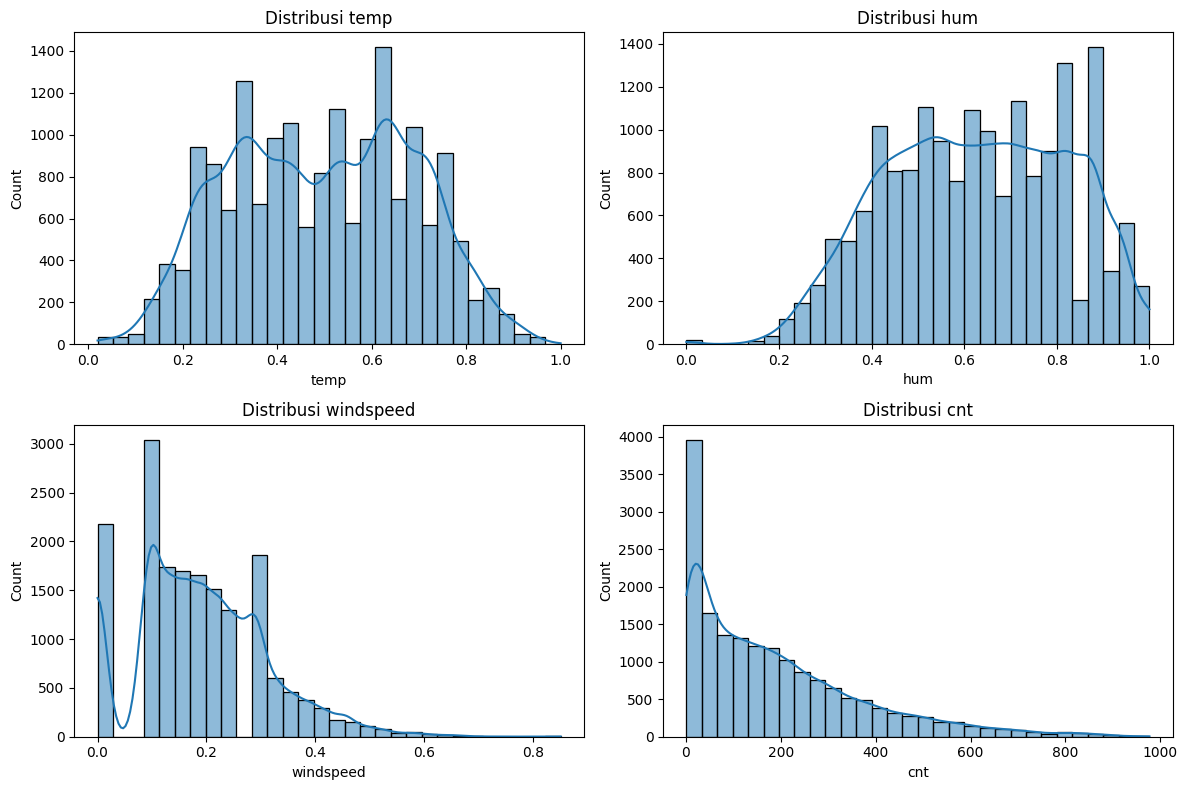

In [88]:
#Histogram
numerical_cols = ['temp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(hour_df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

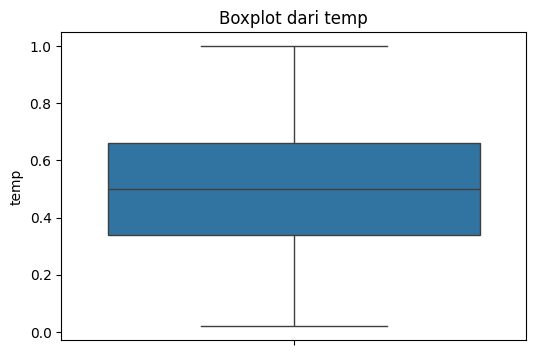

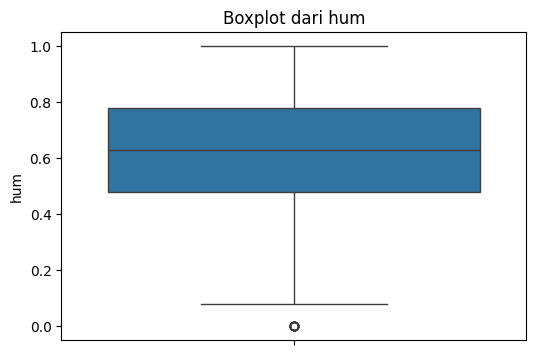

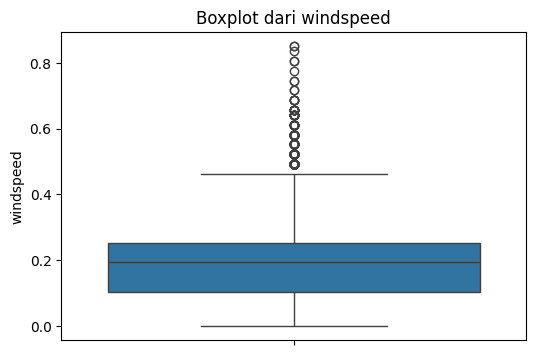

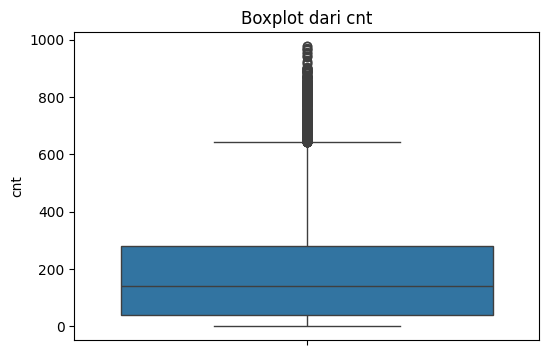

In [92]:
numerical_cols = ['temp', 'hum', 'windspeed', 'cnt']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=hour_df[col])
    plt.title(f'Boxplot dari {col}')
    plt.show()

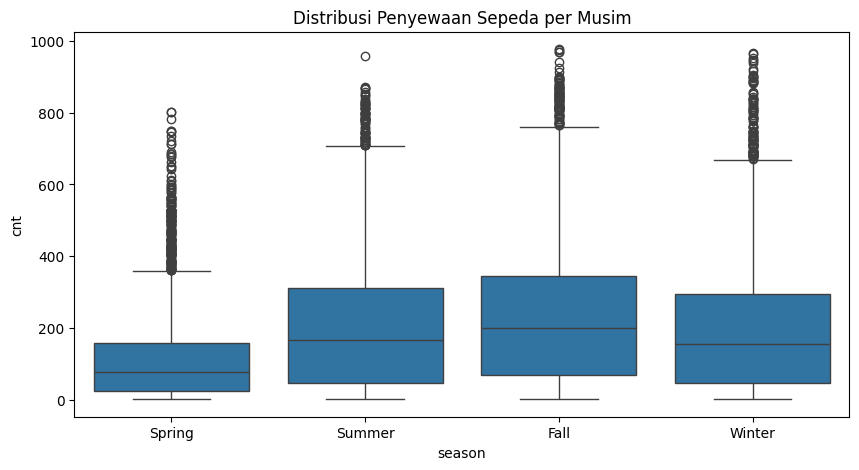

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(x='season', y='cnt', data=hour_df)
plt.title('Distribusi Penyewaan Sepeda per Musim')
plt.show()

Berdasarkan histogram dan box plot di atas dapat dilihat bahwa data pada 'temp', 'hum', 'windspeed', dan 'cnt' tidak berdistribusi normal.

In [ ]:
# Menambahkan kolom casual_p dan registered_p ke dalam dataset
hour_df["casual_p"] = (hour_df["casual"] / hour_df["cnt"]) * 100
hour_df["registerd_p"] = (hour_df["registered"] / hour_df["cnt"]) * 100

# Menampilkan dataset dengan semua kolom
print(hour_df.head())

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda setiap bulan selama tahun 2021 dan 2012, apakah terdapat perbedaan signifikan?

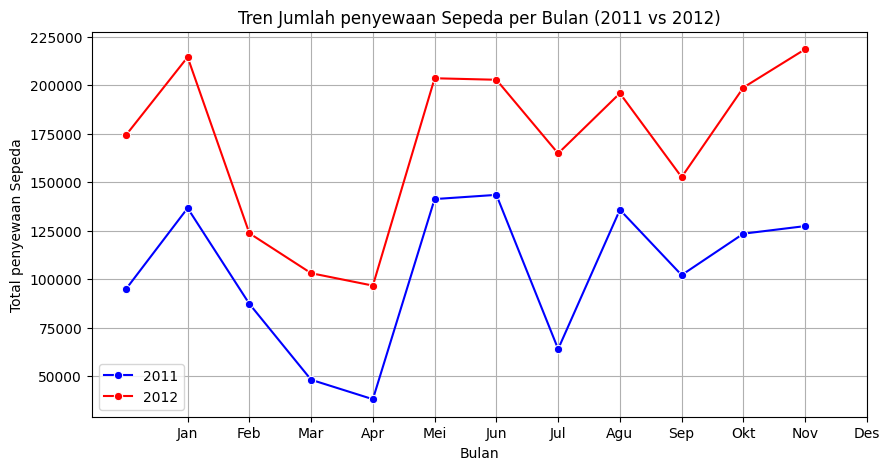

In [189]:
# Filter data berdasarkan tahun
monthly_trend_2011 = hour_df[hour_df["yr"] == 2011].groupby("mnth")["cnt"].sum()
monthly_trend_2012 = hour_df[hour_df["yr"] == 2012].groupby("mnth")["cnt"].sum()

# Plot Line Chart
plt.figure(figsize=(10,5))

# Garis untuk 2011
sns.lineplot(x=monthly_trend_2011.index, y=monthly_trend_2011.values, marker="o", color="b", label="2011")

# Garis untuk 2012
sns.lineplot(x=monthly_trend_2012.index, y=monthly_trend_2012.values, marker="o", color="r", label="2012")

# Atur label sumbu x
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])

plt.xlabel("Bulan")
plt.ylabel("Total penyewaan Sepeda")
plt.title("Tren Jumlah penyewaan Sepeda per Bulan (2011 vs 2012)")
plt.legend()
plt.grid(True)
plt.show()

**Insight:**
- Dengan visulisasi di atas dapat kita lihat bahwa ada perubahan signifikan setiap bulannya.
- Dengan melihat pola grafik, kita bisa mengetahui pola jumlah penyewaan sepeda per setiap bulan pada tahun 2011 dan 2012 memiliki pola yang hampir sama. Di mana di setiap bulannya terus mengalami perubahan, dengan inti pola terdapat penurunan jumlah penyewaan pada bulan April, Juli, dan September.
- Dengan membandingkan kedua garis (biru untuk 2011, merah untuk 2012), kita dapat melihat terjadi peningkatan jumlah penyewaan sepeda, di mana pada tahun 2012 lebih tinggi setiap bulannya dari pada tahun 2011.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda di tahun 2011 dan 2012, apakah terdapat perbedaan signifikan?

weathersit  Cloudy  Few Clouds  Heavy Rain   Rain
yr                                               
2011        300519      875053          36  67495
2012        495433     1463120         187  90836


<Figure size 1000x500 with 0 Axes>

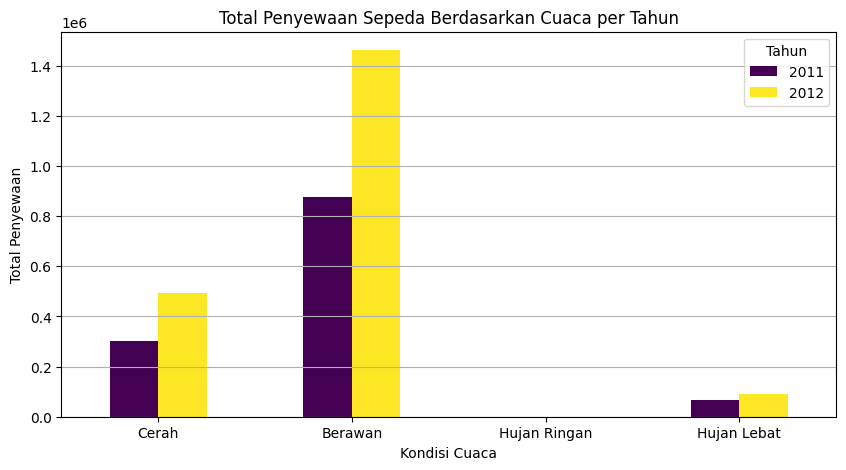

In [190]:
# Menghitung total penyewaan berdasarkan tahun dan kondisi cuaca
weather_trend_yearly = hour_df.groupby(["yr", "weathersit"])["cnt"].sum().unstack()

# Menampilkan hasil data sebelum plot
print(weather_trend_yearly)

# Plot hasilnya
plt.figure(figsize=(10,5))
weather_trend_yearly.T.plot(kind="bar", figsize=(10,5), colormap="viridis")

# Mengatur label
plt.xticks([0,1,2,3], ["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat"], rotation=0)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan")
plt.title("Total Penyewaan Sepeda Berdasarkan Cuaca per Tahun")
plt.legend(["2011", "2012"], title="Tahun")
plt.grid(axis="y")

plt.show()


**Insight:**
- Dengan visulisasi di atas dapat kita lihat bahwa ada perubahan signifikan di setiap kondisi cuaca.
- Dengan melihat grafik, kita bisa mengetahui pada kondisi cuaca "Few Clouds" (Mendung) dan "Cloudy" (Berawan) memiliki jumlah penyewaan tertinggi. Serta penurunan jumlah secara dratis pada kondisi cuaca "Heavy Rain" (Hujan Lebat) dan "Rain" (Hujan Ringan).
- Dengan membandingkan jumlah penyewaan sepeda berdasarkan tahun, terdapat peningkatan signifikan dalam jumlah penyewaan sepeda pada semua kondisi cuaca dari 2011 ke 2012. Menunjukkan tren pertumbuhan positif. 

### Pertanyaan 3: Bagaimana tren penyewaan sepeda berdasarkan jam?

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


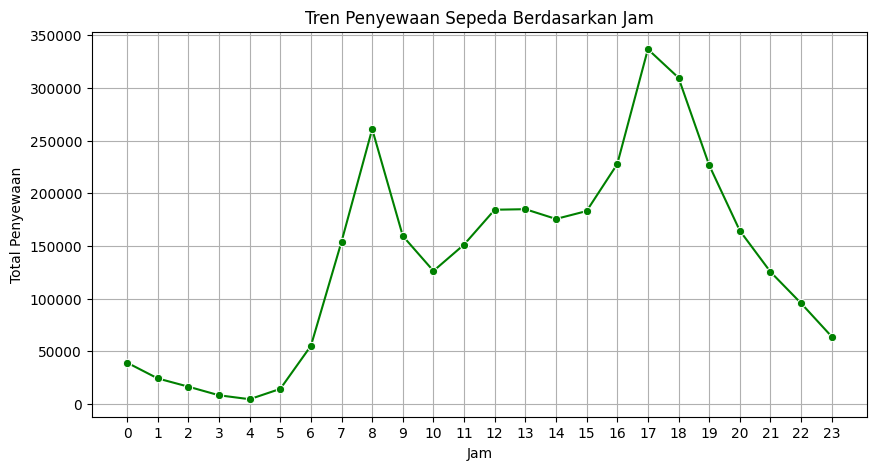

In [191]:
# Menghitung total pepenyewaan berdasarkan jam
hourly_trend = hour_df.groupby("hr")["cnt"].sum()

# Menampilkan hasil data
print(hourly_trend)

# Visualisasi
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker="o", color="g")
plt.xlabel("Jam")
plt.ylabel("Total Penyewaan")
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


**Insight:**
- Berdasarkan visualisasi di atas, jumlah penyewaan sepeda meningkat signifikan pada pukul 08:00 (261.001 penyewaan) dan pukul 17:00 (336.860 penyewaan). Ini menunjukkan bahwa jam tersebut merupakan puncak utama penyewaan, yang kemungkinan besar terkait dengan jam keberangkatan dan pulang aktivitas seperti kerja atau sekolah. Sebaliknya, penyewaan sepeda cenderung rendah pada dini hari (pukul 03:00 - 04:00), mencerminkan minimnya aktivitas pada jam-jam tersebut.

### Pertanyaan 4: Bagaimana pengaruh variabel cuaca (temperatur, kelembaban, dan kecepatan angin) terhadap jumlah penyewaan sepeda?

                cnt      temp       hum  windspeed
cnt        1.000000  0.404772 -0.322911   0.093234
temp       0.404772  1.000000 -0.069881  -0.023125
hum       -0.322911 -0.069881  1.000000  -0.290105
windspeed  0.093234 -0.023125 -0.290105   1.000000


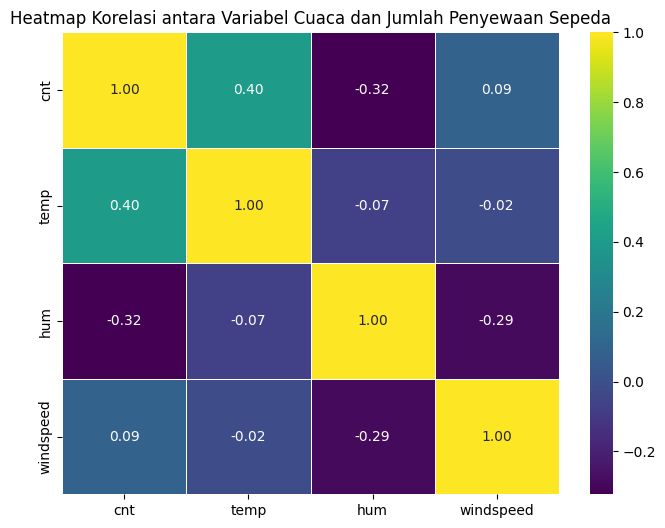

In [192]:
# Menghitung korelasi antara variabel cuaca dan jumlah penyewaan sepeda
correlation = hour_df[["cnt", "temp", "hum", "windspeed"]].corr()
print(correlation)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)

# Mengatur judul
plt.title("Heatmap Korelasi antara Variabel Cuaca dan Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Berdasarkan visualisasi heatmap, semakin berwarna kuning, maka korelasinya semakin kuat dan positif, sedangkan semakin gelap berwarna ungu menunjukkan korelasi yang kuat tetapi negatif. Berdasarkan heatmap diperoleh bahwa Temperatur adalah faktor cuaca yang paling berpengaruh terhadap penyewaan sepeda dan memiliki hubungan yang positif artinya semakin tinggi temperatur semakin banyak penyewaan sepeda, sedangkan Kelembaban hubungan nya negatif artinya semakin tinggi kelembapan semakin jumlah penyewaan sepeda. Serta, Kecepatan angin memiliki pengaruh yang sangat kecil terhadap jumlah penyewaan sepeda.

### Visualisasi tambahan

season    Fall  Spring  Summer  Winter
yr                                    
2011    419650  150000  347316  326137
2012    641479  321348  571273  515476


<Figure size 800x500 with 0 Axes>

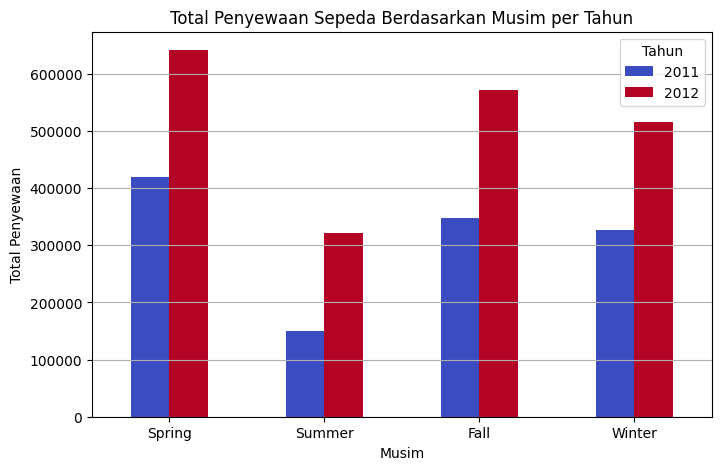

In [193]:
# Menghitung total penyewaan berdasarkan tahun dan musim
season_trend_yearly = hour_df.groupby(["yr", "season"])["cnt"].sum().unstack()

# Menampilkan hasil data
print(season_trend_yearly)

# Visualisasi
plt.figure(figsize=(8,5))
season_trend_yearly.T.plot(kind="bar", figsize=(8,5), colormap="coolwarm")

# Mengatur label
plt.xticks([0,1,2,3], ["Spring", "Summer", "Fall", "Winter"], rotation=0)
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan")
plt.title("Total Penyewaan Sepeda Berdasarkan Musim per Tahun")
plt.legend(["2011", "2012"], title="Tahun")
plt.grid(axis="y")

plt.show()


workingday  Non-Working Day  Working Day
yr                                      
2011                 386839       856264
2012                 613430      1436146


<Figure size 800x500 with 0 Axes>

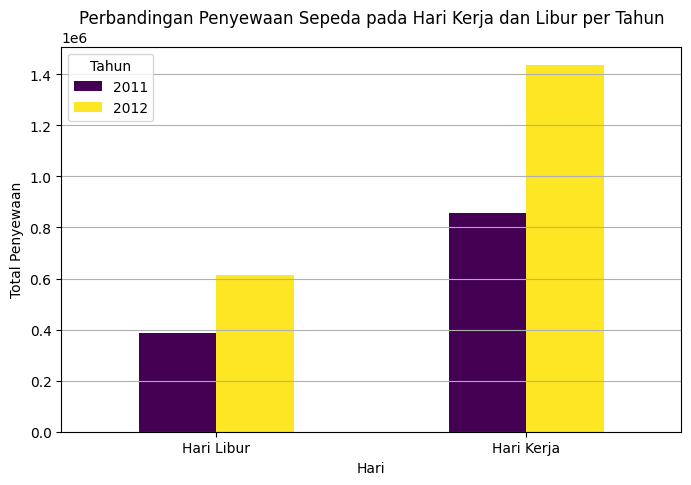

In [194]:
# Menghitung total penyewaan berdasarkan tahun dan hari kerja
workingday_trend_yearly = hour_df.groupby(["yr", "workingday"])["cnt"].sum().unstack()

# Menampilkan hasil data
print(workingday_trend_yearly)

# Visualisasi
plt.figure(figsize=(8,5))
workingday_trend_yearly.T.plot(kind="bar", figsize=(8,5), colormap="viridis")

# Mengatur label
plt.xticks([0,1], ["Hari Libur", "Hari Kerja"], rotation=0)
plt.xlabel("Hari")
plt.ylabel("Total Penyewaan")
plt.title("Perbandingan Penyewaan Sepeda pada Hari Kerja dan Libur per Tahun")
plt.legend(["2011", "2012"], title="Tahun")
plt.grid(axis="y")

plt.show()


## Analisis Lanjutan (Clustering)
### Teknik analisis lanjutan yang dilakukan adalah Clustering Penyewaan Sepeda Berdasarkan Pola Waktu

**Tujuan:**

Mengelompokkan pengguna berdasarkan jam penyewaan untuk memahami kapan dan bagaimana mereka menggunakan layanan sepeda.

**Kategorikan pengguna berdasarkan jam penyewaan tertinggi:**
- Cluster 1 = Commuter: Penyewaan pada jam 07:00 - 09:00 dan 17:00 - 19:00.
- Cluster 2 = Evening Rider: Penyewaan pada jam 18:00 - 22:00.
- Cluster 3 = All-Day Rider: Penyewaan tersebar merata sepanjang hari.
- Cluster 4 = Night Owl: Penyewaan pada 22:00 - 05:00.


In [185]:
# Membuat kolom cluster
cluster = hour_df.groupby("hr")["cnt"].sum().reset_index()

# Menentukan kategori berdasarkan jam penyewaan
def categorize_hour(hr):
    if 7 <= hr <= 9 or 17 <= hr <= 19:
        return "Commuter"
    elif 18 <= hr <= 22:
        return "Evening Rider"
    elif 22 < hr or hr < 5:
        return "Night Owl"
    else:
        return "All-Day Rider"

# Terapkan fungsi ke setiap baris
cluster["Cluster"] = cluster["hr"].apply(categorize_hour)

# Menampilkan hasil
print(cluster)


    hr     cnt        Cluster
0    0   39130      Night Owl
1    1   24164      Night Owl
2    2   16352      Night Owl
3    3    8174      Night Owl
4    4    4428      Night Owl
5    5   14261  All-Day Rider
6    6   55132  All-Day Rider
7    7  154171       Commuter
8    8  261001       Commuter
9    9  159438       Commuter
10  10  126257  All-Day Rider
11  11  151320  All-Day Rider
12  12  184414  All-Day Rider
13  13  184919  All-Day Rider
14  14  175652  All-Day Rider
15  15  183149  All-Day Rider
16  16  227748  All-Day Rider
17  17  336860       Commuter
18  18  309772       Commuter
19  19  226789       Commuter
20  20  164550  Evening Rider
21  21  125445  Evening Rider
22  22   95612  Evening Rider
23  23   63941      Night Owl


In [186]:
# Menyalin dataset asli
df = hour_df.copy()

# Menentukan kategori berdasarkan jam penyewaan
def categorize_hour(hr):
    if 7 <= hr <= 9 or 17 <= hr <= 19:
        return "Commuter"
    elif 18 <= hr <= 22:
        return "Evening Rider"
    elif 22 < hr or hr < 5:
        return "Night Owl"
    else:
        return "All-Day Rider"

# Terapkan fungsi ke setiap baris
df["Cluster"] = df["hr"].apply(categorize_hour)

# Menampilkan hasil
print(df)

       instant     dteday  season    yr      mnth  hr     holiday   weekday  \
0            1 2011-01-01  Spring  2011   January   0  No Holiday  Saturday   
1            2 2011-01-01  Spring  2011   January   1  No Holiday  Saturday   
2            3 2011-01-01  Spring  2011   January   2  No Holiday  Saturday   
3            4 2011-01-01  Spring  2011   January   3  No Holiday  Saturday   
4            5 2011-01-01  Spring  2011   January   4  No Holiday  Saturday   
...        ...        ...     ...   ...       ...  ..         ...       ...   
17374    17375 2012-12-31  Spring  2012  December  19  No Holiday    Monday   
17375    17376 2012-12-31  Spring  2012  December  20  No Holiday    Monday   
17376    17377 2012-12-31  Spring  2012  December  21  No Holiday    Monday   
17377    17378 2012-12-31  Spring  2012  December  22  No Holiday    Monday   
17378    17379 2012-12-31  Spring  2012  December  23  No Holiday    Monday   

            workingday  weathersit  temp   atemp   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9052\2784748559.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Total_Penyewaan", data=cluster_summary, palette="coolwarm")


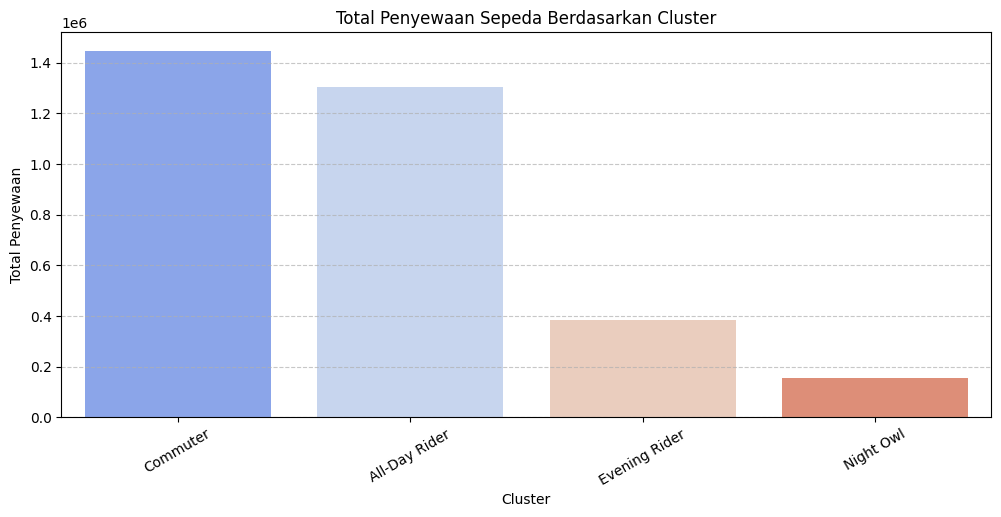

In [187]:
# Menghitung total dan rata-rata penyewaan per cluster
cluster_summary = df.groupby("Cluster").agg(
    Total_Penyewaan=("cnt", "sum"),
    Rata_rata_Penyewaan=("cnt", "mean"),
    Jumlah_Observasi=("cnt", "count")
).reset_index()

# Mengurutkan berdasarkan total penyewaan agar lebih mudah dibaca
cluster_summary = cluster_summary.sort_values(by="Total_Penyewaan", ascending=False)

# Membuat plot
plt.figure(figsize=(12, 5))
sns.barplot(x="Cluster", y="Total_Penyewaan", data=cluster_summary, palette="coolwarm")

# Menambahkan judul dan label
plt.xlabel("Cluster")
plt.ylabel("Total Penyewaan")
plt.title("Total Penyewaan Sepeda Berdasarkan Cluster")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**
- Jumlah penyewaan sepeda paling optimal terjadi pada Cluster Commuter, sehingga strategi promosi atau insentif bisa difokuskan pada jam ini untuk menarik lebih banyak pelanggan tetap. Selanjutnya di ikuti pada Cluster All-Day Rider dan Evening Rider, dan Cluster Night Owl kurang efektif untuk bisnis penyewaan sepeda, sehingga operasional atau penyesuaian harga di jam ini bisa dipertimbangkan.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9052\392857277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Rata_rata_Penyewaan", data=cluster_summary, palette="magma")


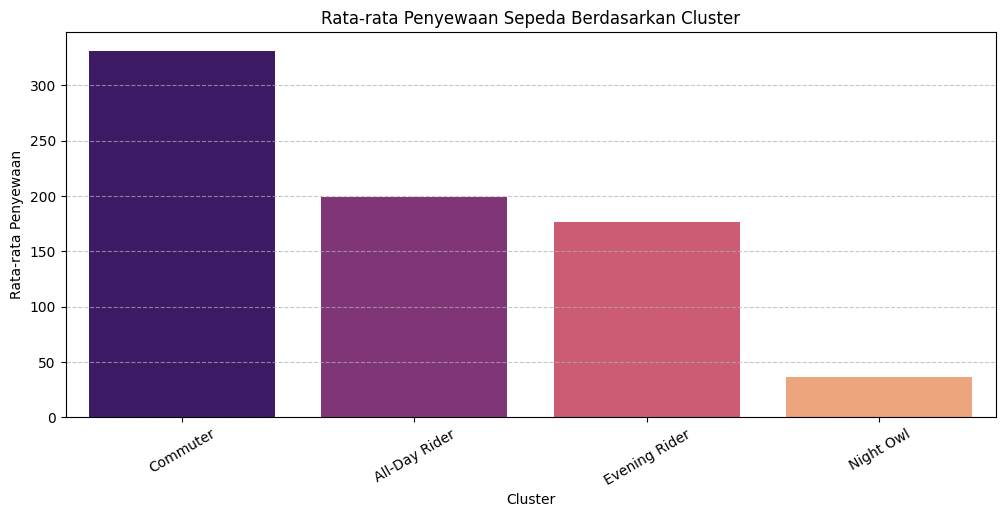

In [195]:
# Grafik rata-rata penyewaan
plt.figure(figsize=(12, 5))
sns.barplot(x="Cluster", y="Rata_rata_Penyewaan", data=cluster_summary, palette="magma")

# Menambahkan judul dan label
plt.xlabel("Cluster")
plt.ylabel("Rata-rata Penyewaan")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Cluster")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**

Penyewaan sepeda paling optimal terjadi pada Cluster Commuter dan paling tidak optimal saat Cluster Night Owl.


## Conclusion

- Conclusion pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda setiap bulan selama tahun 2021 dan 2012, apakah terdapat perbedaan signifikan?

Berdasarkan visualisasi data yang dilakukan dapat dilihat bahwa ada perbedaan signifikan jumlah penyewaan sepeda pada setiap bulan, dengan pola penurunan pada bulan April, Juli, dan September. Serta, terdapat peningkatan jumlah penyewaan sepeda pada tahun 2012 dibandingkan 2011 berdasarkan parameter bulan.

- Conclusion pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda di tahun 2011 dan 2012, apakah terdapat perbedaan signifikan?

Berdasarkan visualisasi data yang dilakukan dapat dilihat bahwa ada perbedaan signifikan jumlah penyewaan sepeda pada setiap kondisi cuaca, di mana jumlah penyewaan paling tinggi terjadi pada kondisi cuaca "Few Clouds" (Mendung) dan "Cloudy" (Berawan) dan jumlah penyewaan sepeda paling rendah pada kondisi cuaca "Heavy Rain" (Hujan Lebat) dan "Rain" (Hujan Ringan). Serta,  terdapat peningkatan jumlah penyewaan sepeda pada tahun 2012 dibandingkan 2011 berdasarkan parameter kondisi cuaca.

- Conclusion pertanyaan 3: Bagaimana tren penyewaan sepeda berdasarkan jam?

Berdasarkan visualisasi data yang dilakukan dapat dilihat bahwa terdapat tren jumlah penyewaan sepeda, di mana terdapat peningkatan jumlah penyewaan sepeda pada pukul 08:00 dan 17:00, sementara jumlah penyewaan sepeda terendah terjadi pada pukul 03:00 - 04:00.

- Conclusion pertanyaan 4: Bagaimana pengaruh variabel cuaca (temperatur, kelembaban, dan kecepatan angin) terhadap jumlah penyewaan sepeda?

Berdasarkan visualisasi data yang dilakukan dapat dilihat bahwa semakin berwarna kuning, maka korelasinya semakin kuat dan positif, sedangkan semakin ungu menunjukkan korelasi yang kuat tetapi negatif. Serta diperoleh faktor cuaca yang paling berpengaruh adalah temperatur dengan korelasi positif dan kelembapan dengan korelasi negatif, serta kecepatan angin memiliki pengaruh yang sangat kecil dalam mempengaruhi jumlah penyewaan sepeda.

- Conslusion Analisis Lanjutan (Clustering)

Berdasarkan Analisis Lanjut yaitu dengan metode Clustering diperoleh jumlah penyewaan sepeda paling optimal terjadi pada Cluster Commuter yaitu cluster pada jam 07:00 - 09:00 dan 17:00 - 19:00, sedangkan jumlah penyewaan sepeda paling tidak optimal terjadi pada Cluster All-Day Rider dan Cluster Evening Rider pada jam 18:00 - 22:00.


## Saran

Berdasarkan analisis dan visualisasi data yang dilakukan untuk meningkatkan pendapatan dapat dilakukan dengan penambahan jumlah sepeda pada bulan Januari dan November berdasarkan parameter bulan, pada kondisi cuaca "Few Clouds" (Mendung) dan "Cloudy" (Berawan) berdasarkan parameter cuaca, pada pukul 08.00 dan 17.00 berdasarkan parameter jam. Dan untuk mendapatkan keputusan yang lebih pasti dapat dilakukan analisis yang lebih lanjut.

In [ ]:
#Data Yang telah siap di Cleaning untuk persiapan Dashboard
df.to_csv("data_penyewaan.csv", index=False)
df.to_csv("C:/Users/Lenovo/Downloads/data_penyewaan.csv", index=False)  # Windows
